```
#How many states this US state borders
SELECT ?state ?stateLabel ?borders
WHERE
{
  {
    SELECT ?state (COUNT(?otherState) as ?borders)
    WHERE
    {
    ?state wdt:P31 wd:Q35657 .
    ?otherState wdt:P47 ?state .
    ?otherState wdt:P31 wd:Q35657 .
    }
    GROUP BY ?state
  }
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" .
  }
}        
ORDER BY DESC(?borders)
```

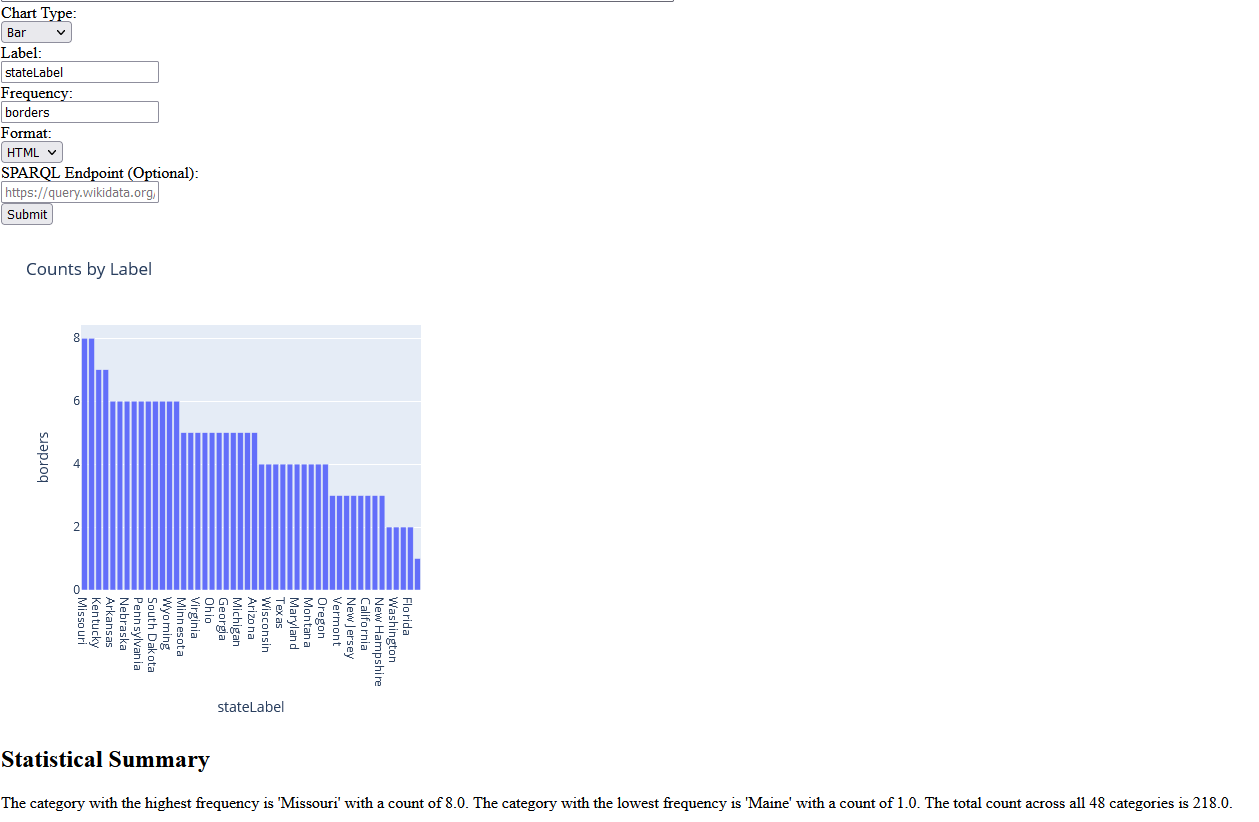

```
SELECT ?continent ?continentLabel (SUM(?population) AS ?totalPopulation)
WHERE {
  ?continent wdt:P31 wd:Q5107 .
  ?country wdt:P30 ?continent .
  ?country wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?continent ?continentLabel
HAVING (BOUND(?totalPopulation))
```

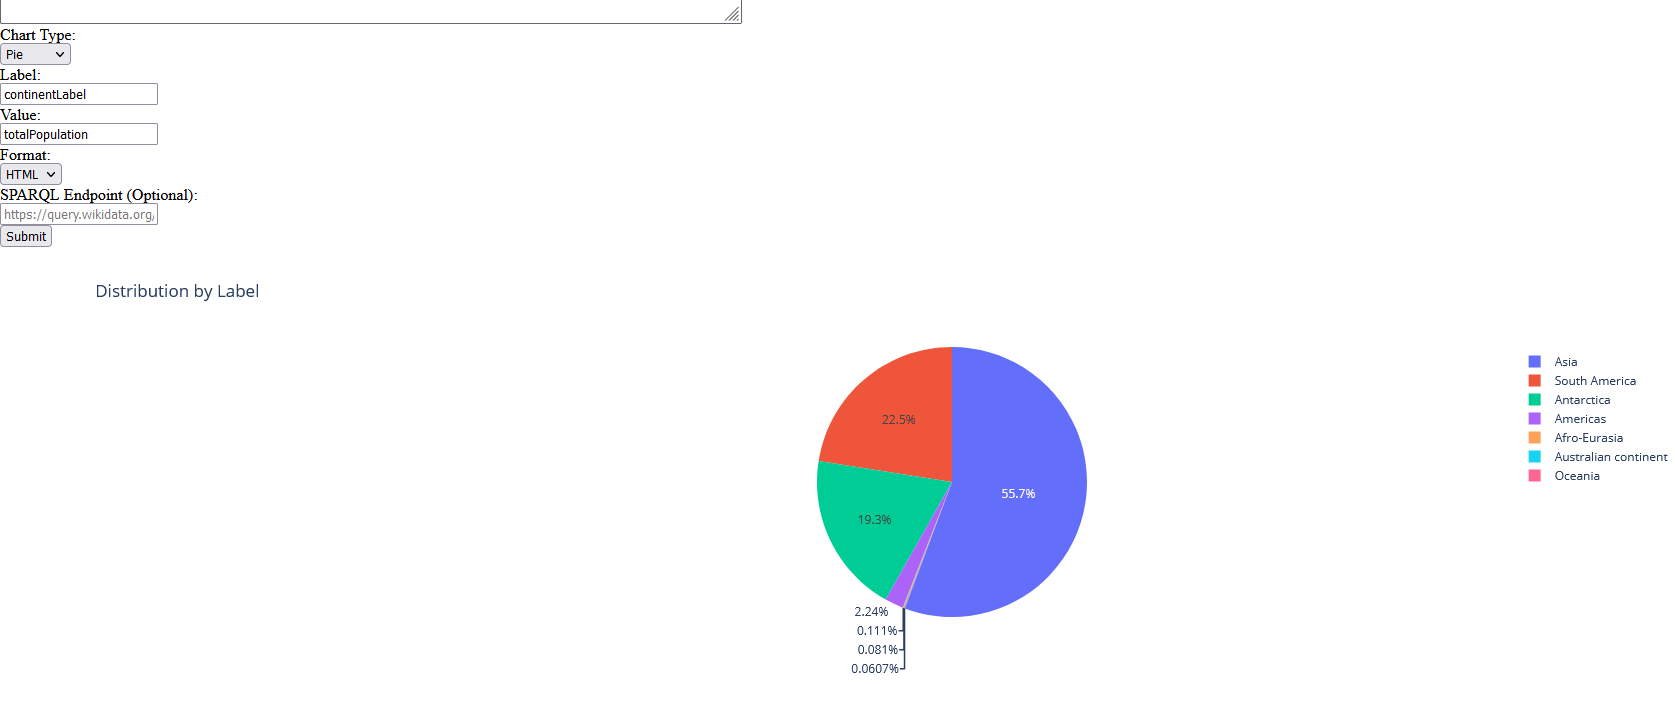

this query has timeout issue
```
SELECT ?country ?countryLabel ?energyType (SUM(?production) AS ?totalProduction)
WHERE {
  ?country wdt:P31 wd:Q6256 .
  ?powerPlant wdt:P17 ?country .
  ?powerPlant wdt:P2051 ?production .
  ?powerPlant wdt:P618 ?energyType .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?country ?countryLabel ?energyType
```

523 results! its too much for pie chart.
 the distribution of land use types in the United States.
```
SELECT ?landUse ?landUseLabel (SUM(?area) AS ?totalArea)
WHERE {
  wd:Q30 wdt:P31 wd:Q6256 .
  ?territory wdt:P17 wd:Q30 .
  ?territory wdt:P2046 ?area .
  ?territory wdt:P1278 ?landUse .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
GROUP BY ?landUse ?landUseLabel
```

    Label (x-axis): Gender (Male, Female)
    Frequency (y-axis): Number of pandas in each gender group

    Bar chart
    
```
SELECT ?gender (COUNT(?pandaItem) AS ?numberOfPandas)
WHERE {
  ?pandaItem wdt:P31 wd:Q33602 . # giant panda
  OPTIONAL { 
    ?pandaItem wdt:P21 [ rdfs:label ?gender ] .
    FILTER ( LANG(?gender) = "en" ) .
  }
}
GROUP BY ?gender
```
```
# Giant pandas

SELECT
?pandaItem ?englishName ?chineseName ?image ?gender ?studNumber
?fatherItem ?fatherName ?motherItem ?motherName ?dateOfBirth ?dateOfDeath
WHERE
{
  ?pandaItem wdt:P31 wd:Q33602 . # giant panda
  OPTIONAL { ?pandaItem wdt:P21 [ rdfs:label ?gender ] .
             FILTER ( LANG(?gender) = "en" ) . }
  OPTIONAL { ?pandaItem wdt:P18 ?image . }
  OPTIONAL { ?pandaItem p:P528 [ ps:P528 ?studNumber ;
                                 pq:P972 wd:Q46596139 ] . } # International Studbook for Giant Panda
  OPTIONAL { ?pandaItem rdfs:label ?englishName .
             FILTER( LANG(?englishName) = "en" ) . }
  OPTIONAL { ?pandaItem rdfs:label ?chineseName .
             FILTER( LANG(?chineseName) = "zh" ) . }
  OPTIONAL { ?pandaItem wdt:P22 ?fatherItem .
             ?fatherItem rdfs:label ?fatherName .
             FILTER ( LANG(?fatherName) = "en" ) . }
  OPTIONAL { ?pandaItem wdt:P25 ?motherItem .
             ?motherItem rdfs:label ?motherName .
             FILTER ( LANG(?motherName) = "en" ) . }   
  OPTIONAL { ?pandaItem wdt:P569 ?dateOfBirth . }
  OPTIONAL { ?pandaItem wdt:P570 ?dateOfDeath . }
}
```

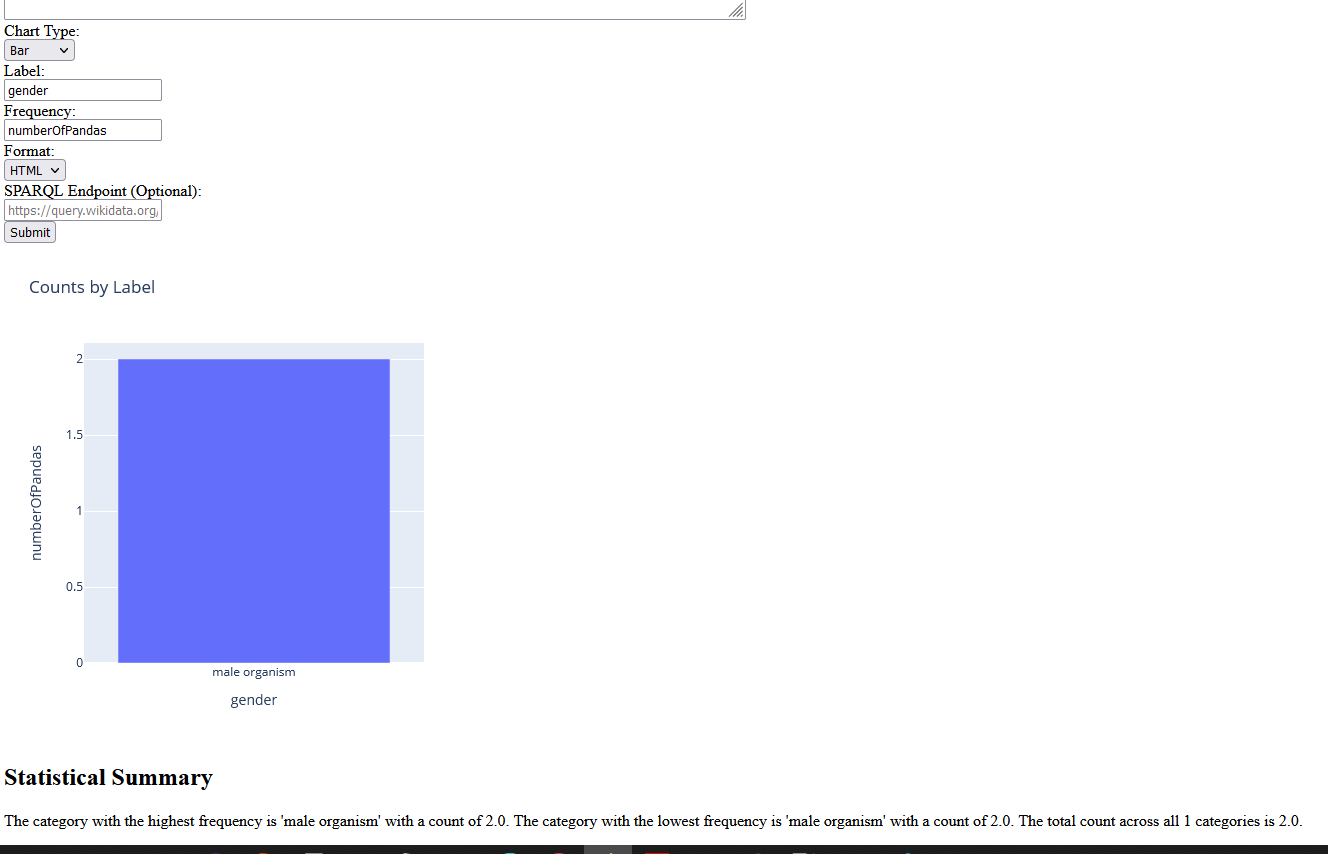


```
SELECT ?artwork ?artworkLabel (SAMPLE(?kms) AS ?kms) (SAMPLE(?height) AS ?height) (SAMPLE(?width) AS ?width) (SAMPLE(?url) AS ?url) WHERE {	
   ?artwork wdt:P195 wd:Q671384 .  # SMK
   ?artwork wdt:P170 wd:Q979541 .  # Martinus Rørby
   SERVICE wikibase:label {
     bd:serviceParam wikibase:language "da" .
   } 
   OPTIONAL {?artwork wdt:P217 ?kms } 
   OPTIONAL {?artwork wdt:P2048 ?height } 
   OPTIONAL {?artwork wdt:P2049 ?width } 
   OPTIONAL {?artwork wdt:P973 ?url } 
 }
GROUP BY ?artwork ?artworkLabel
LIMIT 20
```

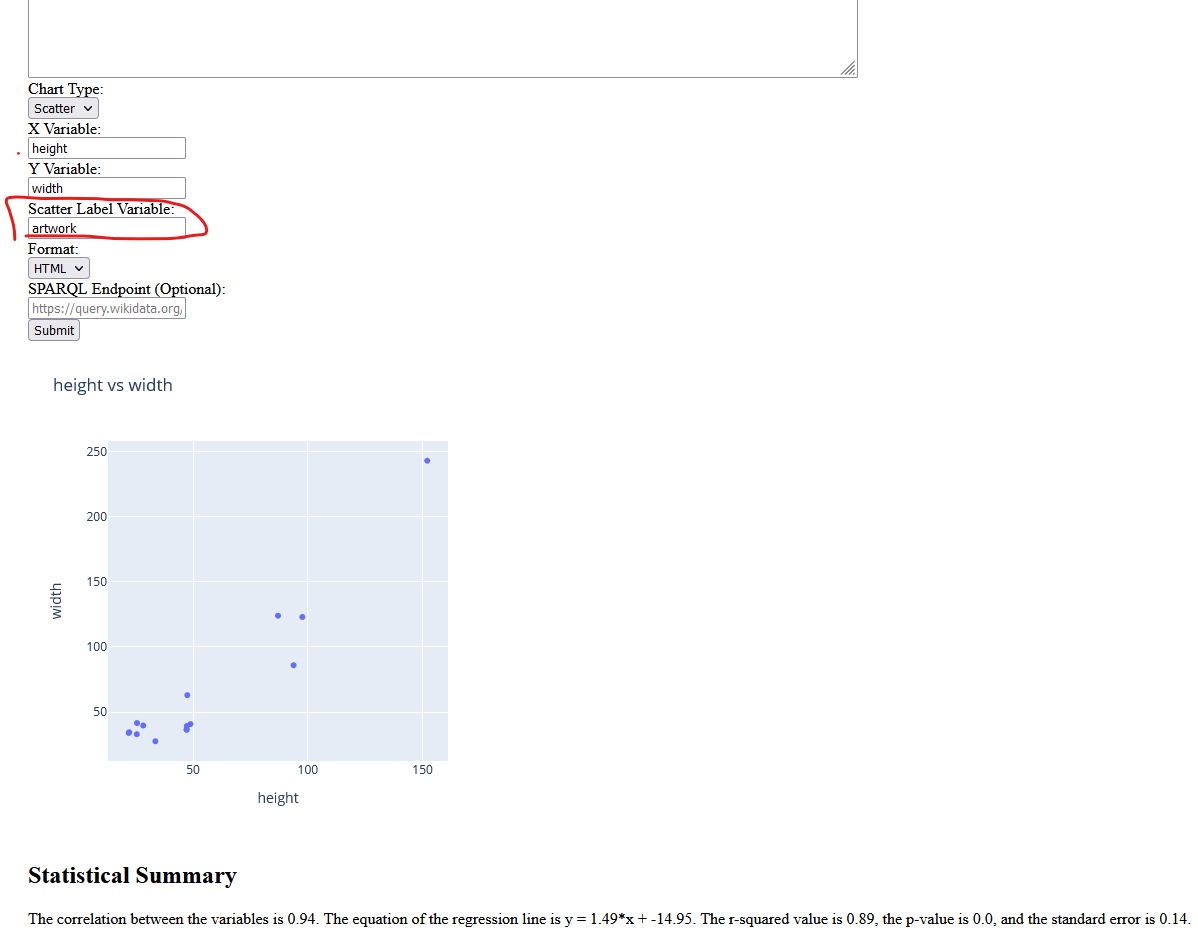

Most cited machine learning papers
scatterplot option
```
SELECT
?paperItem ?title ?firstAuthor ?year
(COUNT(?citationItem) AS ?numOfCitations)
WHERE {
   ?paperItem wdt:P31 wd:Q13442814 ;
              wdt:P921 wd:Q2539 ; # machine learning
              wdt:P2860 ?citationItem .
  OPTIONAL { ?paperItem wdt:P1476 ?title . }
  OPTIONAL { ?paperItem wdt:P577 ?publicationDate . 
             BIND (YEAR(?publicationDate) AS ?year) . }
  OPTIONAL { ?paperItem p:P2093 [ ps:P2093 ?firstAuthorString;
                                  pq:P1545 "1" ] . }
  OPTIONAL { ?paperItem p:P50 [ ps:P50 [ rdfs:label ?firstAuthorLabel ] ;
                                pq:P1545 "1" ] .
             FILTER (LANG(?firstAuthorLabel) = "en") . }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en".
                           ?firstAuthorItem rdfs:label ?firstAuthorLabel . }
  BIND (IF(BOUND(?firstAuthorString), ?firstAuthorString, ?firstAuthorLabel) AS ?firstAuthor) .
}
GROUP BY ?paperItem ?title ?firstAuthor ?year
ORDER BY DESC(?numOfCitations)
LIMIT 50
```

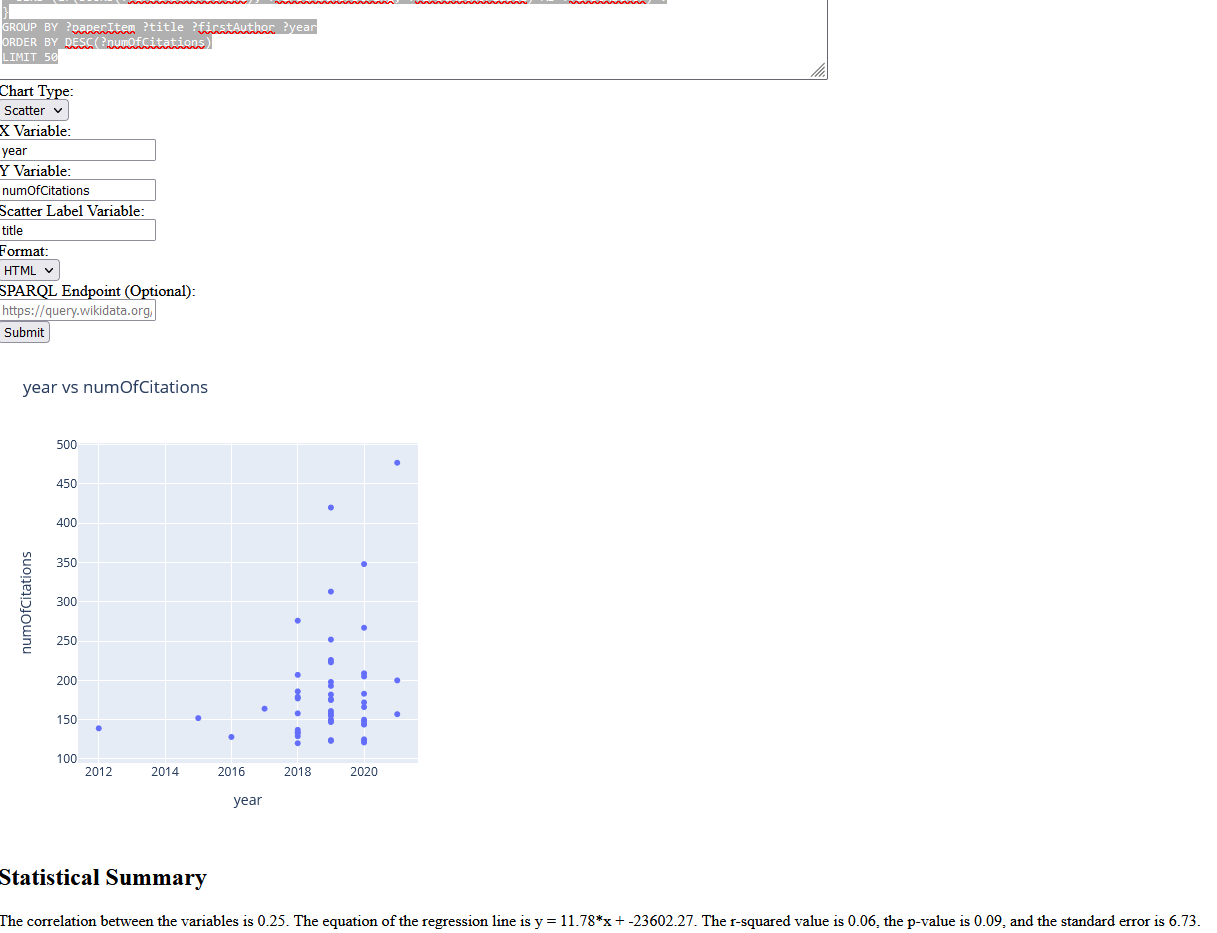

Academy Award-winning females and males and non binary
```
SELECT ?personGender (COUNT(DISTINCT ?personItem) AS ?numberOfWinners)
WHERE {
  ?personAwardItem wdt:P31 wd:Q19020 . # Academy Award
  ?personItem wdt:P166 ?personAwardItem .
  OPTIONAL { ?personItem wdt:P21 ?personGenderItem . }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en" .
                           ?personGenderItem rdfs:label ?personGender . }
}
GROUP BY ?personGender
ORDER BY ?personGender
```

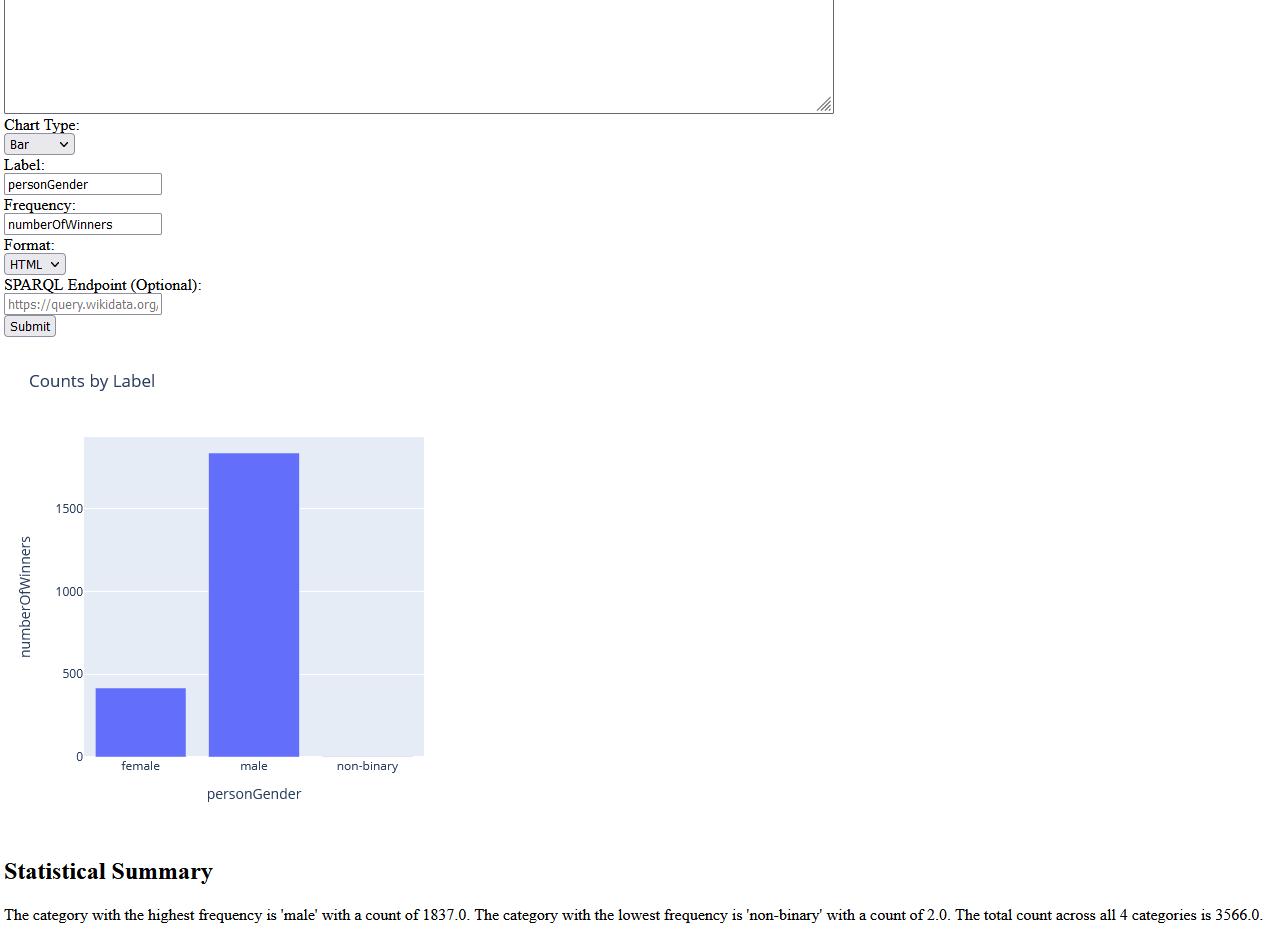

for scatter plot. but it gives usefull error.
```
SELECT DISTINCT
?paintingItem ?paintingName ?image ?artistItem ?artistName ?year ?accessionNumber
WHERE {
  VALUES ?movementItem { wd:Q166713 } . # impressionism or post-impressionism
  ?paintingItem wdt:P31 wd:Q3305213 ; # painting
            wdt:P195 wd:Q160236 ; # MET collection
            wdt:P170 ?artistItem .
  { ?paintingItem wdt:P135+ ?movementItem }
  UNION { ?artistItem wdt:P135+ ?movementItem } .
  OPTIONAL { ?paintingItem wdt:P18 ?image . }
  OPTIONAL { ?paintingItem p:P217 [ ps:P217 ?accessionNumber ;
                                    pq:P195 wd:Q160236 ] }
  OPTIONAL { ?paintingItem wdt:P571 ?date .
             BIND(YEAR(?date) AS ?year) . }
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en".
                           ?paintingItem rdfs:label ?paintingName .
                           ?artistItem rdfs:label ?artistName }
}
Limit 10
```

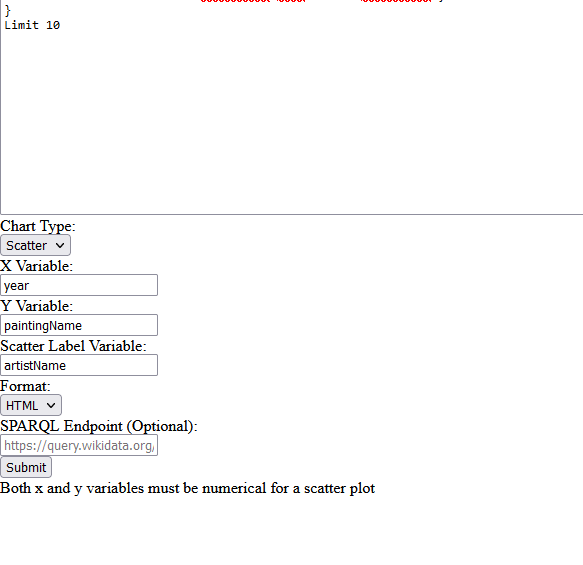